In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
# plt.style.use('dark_background')

from sklearn import preprocessing as prep

# Data Loading

In [2]:
df = pd.read_csv("datasets/train.csv")
df_test = pd.read_csv("datasets/test.csv")
print(df.index)
df.head()

RangeIndex(start=0, stop=891, step=1)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
for label in df.columns:
    print(label + ": " + str(sum(df[label].isnull())) + " missing values")

PassengerId: 0 missing values
Survived: 0 missing values
Pclass: 0 missing values
Name: 0 missing values
Sex: 0 missing values
Age: 177 missing values
SibSp: 0 missing values
Parch: 0 missing values
Ticket: 0 missing values
Fare: 0 missing values
Cabin: 687 missing values
Embarked: 2 missing values


In [6]:
for label in df_test.columns:
    print(label + ": " + str(sum(df_test[label].isnull())) + " missing values")

PassengerId: 0 missing values
Pclass: 0 missing values
Name: 0 missing values
Sex: 0 missing values
Age: 86 missing values
SibSp: 0 missing values
Parch: 0 missing values
Ticket: 0 missing values
Fare: 1 missing values
Cabin: 327 missing values
Embarked: 0 missing values


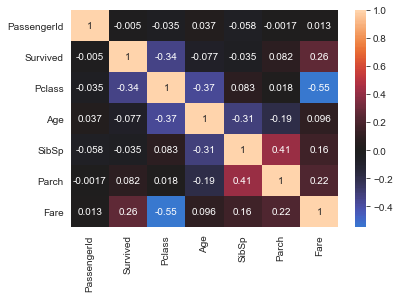

In [7]:
sns.heatmap(df.corr(), center=0, annot=True);

# Cleaning Data

## Age

In [8]:
# check if this grouping will work
df.groupby(['Pclass', 'SibSp']).median()

PassengerId  Survived   Age  Parch      Fare
Pclass SibSp                                              
1      0            476.0       1.0  37.0    0.0   39.6000
       1            485.0       1.0  38.0    0.0   79.2000
       2            572.0       1.0  44.0    0.0  133.6500
       3             89.0       1.0  23.0    2.0  263.0000
2      0            407.0       0.0  30.0    0.0   13.0000
       1            451.0       1.0  29.0    1.0   26.0000
       2            565.5       0.5  23.5    1.0   39.0000
       3            727.0       1.0  30.0    0.0   21.0000
3      0            472.0       0.0  26.0    0.0    7.8958
       1            372.0       0.0  25.0    0.0   15.5500
       2            334.0       0.0  19.5    0.0   19.2583
       3            302.5       0.0   6.0    1.0   25.4667
       4            264.5       0.0   6.5    1.5   31.2750
       5            387.0       0.0  11.0    2.0   46.9000
       8            325.0       0.0   NaN    2.0   69.5500

In [9]:
# fill with medians of same Pclass and SibSp
df_medians = df.groupby(['Pclass', 'SibSp'])['Age'].transform('median')
df['Age'] = df['Age'].fillna(df_medians)

# fill with medians of same Pclass (for Pclass:3 SibSp:8 where Age:NaN)
df_medians = df.groupby('Pclass')['Age'].transform('median')
df['Age'] = df['Age'].fillna(df_medians)

In [10]:
# same for test dataset
df_test_medians = df_test.groupby(['Pclass', 'SibSp'])['Age'].transform('median')
df_test['Age'] = df_test['Age'].fillna(df_test_medians)

df_test_medians = df_test.groupby('Pclass')['Age'].transform('median')
df_test['Age'] = df_test['Age'].fillna(df_test_medians)

## Embarked

In [11]:
print(df['Embarked'].value_counts(), "\n")
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].value_counts().idxmax())
print(df['Embarked'].value_counts())

df_test['Embarked'] = df_test['Embarked'].fillna(df_test['Embarked'].value_counts().idxmax())

S    644
C    168
Q     77
Name: Embarked, dtype: int64 

S    646
C    168
Q     77
Name: Embarked, dtype: int64


## Fare

In [12]:
df_test_medians = df_test.groupby('Pclass')['Fare'].transform('median')
df_test['Fare'] = df_test['Fare'].fillna(df_test_medians)

## Confirm

In [13]:
for label in df.columns:
    print(label + ": " + str(sum(df[label].isnull())) + " missing values")

PassengerId: 0 missing values
Survived: 0 missing values
Pclass: 0 missing values
Name: 0 missing values
Sex: 0 missing values
Age: 0 missing values
SibSp: 0 missing values
Parch: 0 missing values
Ticket: 0 missing values
Fare: 0 missing values
Cabin: 687 missing values
Embarked: 0 missing values


In [14]:
for label in df_test.columns:
    print(label + ": " + str(sum(df_test[label].isnull())) + " missing values")

PassengerId: 0 missing values
Pclass: 0 missing values
Name: 0 missing values
Sex: 0 missing values
Age: 0 missing values
SibSp: 0 missing values
Parch: 0 missing values
Ticket: 0 missing values
Fare: 0 missing values
Cabin: 327 missing values
Embarked: 0 missing values


## Encoding

In [15]:
# label encoding 'Sex'
le = prep.LabelEncoder()
le.fit(pd.unique(df['Sex']))
df['Sex'] = le.transform(df['Sex'])

# label encoding 'Embarked'
le = prep.LabelEncoder()
le.fit(pd.unique(df['Embarked']))
df['Embarked'] = le.transform(df['Embarked'])

# drop some columns
df = df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,25.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [16]:
# same for test dataset

le = prep.LabelEncoder()
le.fit(pd.unique(df_test['Sex']))
df_test['Sex'] = le.transform(df_test['Sex'])

le = prep.LabelEncoder()
le.fit(pd.unique(df_test['Embarked']))
df_test['Embarked'] = le.transform(df_test['Embarked'])

df_test = df_test.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,24.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,24.0,0,0,8.0500,2


## Data Visualisation

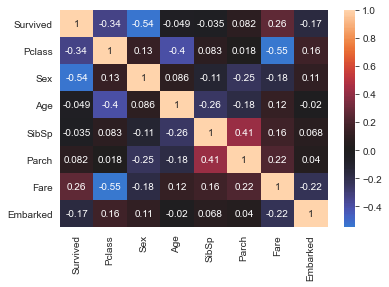

In [17]:
sns.heatmap(df.corr(), center=0, annot=True);
plt.savefig("media/heatmap.png", dpi=400)

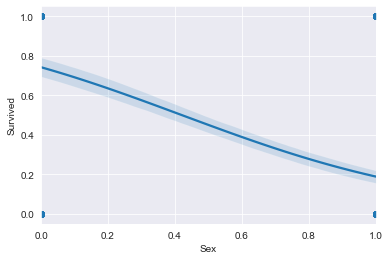

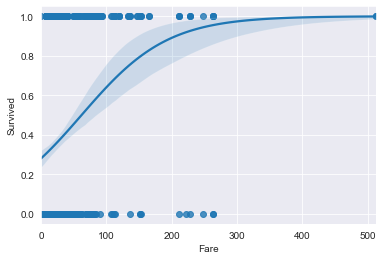

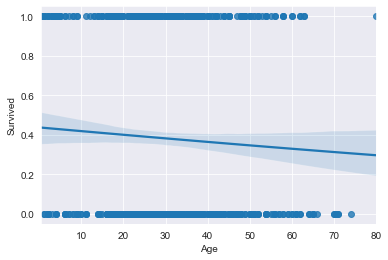

In [18]:
sns.regplot(y='Survived', x='Sex', data=df, logistic=True);
plt.savefig("media/gender.png", dpi=400)
plt.show();
sns.regplot(y='Survived', x='Fare', data=df, logistic=True);
plt.savefig("media/fare.png", dpi=400)
plt.show();
sns.regplot(y='Survived', x='Age', data=df, logistic=True);
plt.show();

# Building Model

In [19]:
from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [20]:
x = df.drop(['Survived'], axis=1)
y = df['Survived']

scaler = prep.StandardScaler()
x = scaler.fit_transform(x)
x_test = scaler.transform(df_test)

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

In [21]:
# logistic regression: the simplest is often the best
model_log = LogisticRegression()

model_log.fit(x_train, y_train)
preds = model_log.predict(x_val)
print("accuracy:", accuracy_score(y_val, preds))
print("f1:", f1_score(y_val, preds))
print("confusion matrix:\n", confusion_matrix(y_val, preds))

accuracy: 0.8212290502793296
f1: 0.7866666666666666
confusion matrix:
 [[88 13]
 [19 59]]


In [22]:
# linear svm with grid search
svm = SVC()
parameters = {'kernel':['linear'], 'C':[0.001, 0.002, 0.003, 0.004, 0.005]}

model_lin = GridSearchCV(svm, parameters, cv=5)
model_lin.fit(x_train, y_train)
y_pred = model_lin.predict(x_val)
print("best model:", model_lin.best_estimator_)
print("accuracy:", accuracy_score(y_val, y_pred))
print("f1:", f1_score(y_val, y_pred))
print("confusion matrix:\n", confusion_matrix(y_val, y_pred))

best model: SVC(C=0.004, kernel='linear')
accuracy: 0.8156424581005587
f1: 0.781456953642384
confusion matrix:
 [[87 14]
 [19 59]]


In [23]:
# rbf svm with grid search
svm = SVC()
parameters = {'kernel':['rbf'], 'C':[13, 14, 15, 16, 17], 'gamma':[0.065, 0.07, 0.075, 0.08, 0.085]}

model_rbf = GridSearchCV(svm, parameters, cv=5)
model_rbf.fit(x_train, y_train)
y_pred = model_rbf.predict(x_val)
print("best model:", model_rbf.best_estimator_)
print("accuracy:", accuracy_score(y_val, y_pred))
print("f1:", f1_score(y_val, y_pred))
print("confusion matrix:\n", confusion_matrix(y_val, y_pred))

best model: SVC(C=13, gamma=0.075)
accuracy: 0.8491620111731844
f1: 0.8029197080291971
confusion matrix:
 [[97  4]
 [23 55]]


In [24]:
# poly svm with grid search
svm = SVC()
parameters = {'kernel':['poly'], 'C':[0.9, 0.95, 1, 1.05, 1.1], 'gamma':['scale', 'auto']}

model_poly = GridSearchCV(svm, parameters, cv=5)
model_poly.fit(x_train, y_train)
y_pred = model_poly.predict(x_val)
print("best model:", model_poly.best_estimator_)
print("accuracy:", accuracy_score(y_val, y_pred))
print("f1:", f1_score(y_val, y_pred))
print("confusion matrix:\n", confusion_matrix(y_val, y_pred))

best model: SVC(C=1, gamma='auto', kernel='poly')
accuracy: 0.8435754189944135
f1: 0.8082191780821918
confusion matrix:
 [[92  9]
 [19 59]]


In [25]:
# sigmoid svm with grid search
svm = SVC()
parameters = {'kernel':['sigmoid'], 'C':[0.02, 0.021, 0.022, 0.023, 0.024], 'gamma':['scale', 'auto']}

model_sig = GridSearchCV(svm, parameters, cv=5)
model_sig.fit(x_train, y_train)
y_pred = model_sig.predict(x_val)
print("best model:", model_sig.best_estimator_)
print("accuracy:", accuracy_score(y_val, y_pred))
print("f1:", f1_score(y_val, y_pred))
print("confusion matrix:\n", confusion_matrix(y_val, y_pred))

best model: SVC(C=0.022, gamma='auto', kernel='sigmoid')
accuracy: 0.8044692737430168
f1: 0.7682119205298013
confusion matrix:
 [[86 15]
 [20 58]]


# Predicting on the Test Dataset

In [26]:
lin_preds = pd.DataFrame(model_lin.predict(x_test))
rbf_preds = pd.DataFrame(model_rbf.predict(x_test))

lin_preds.to_csv("datasets/LinPreds.csv", index=False)
rbf_preds.to_csv("datasets/RbfPreds.csv", index=False)